### 5.2 K-MEANS CLUSTERING 

K-means clustering is a popular and widely used unsupervised learning technique for grouping similar data points together. It is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. The objective of the K-means algorithm is to minimize the sum of distances between the data points and the cluster centroid.

The algorithm works as follows:

1.	Select K initial centroids, where K is the number of clusters we want to form. These centroids can be chosen randomly from the data points.

2.	Assign each data point to the closest centroid.

3.	Recalculate the centroid for each cluster by taking the mean of all the data points in the cluster.

4.	Repeat steps 2 and 3 until convergence, i.e., until the centroids stop changing.


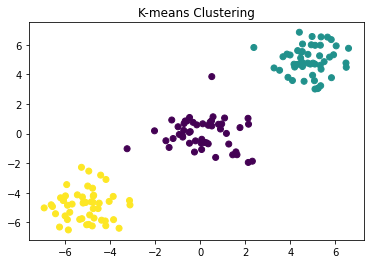

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 1.28946753e-01  8.45753666e-04]
 [ 4.86432437e+00  4.92798260e+00]
 [-5.09545288e+00 -4.85993795e+00]]


In [3]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random dataset with 2 features and 3 clusters
X = np.random.randn(150, 2)
X[:50] += 5
X[50:100] -= 5
y = np.concatenate([np.zeros(50), np.ones(50), np.ones(50) * 2])

# Instantiate KMeans algorithm with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans to data
kmeans.fit(X)

# Predict cluster labels for data points
y_pred = kmeans.predict(X)

# Plot data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-means Clustering")
plt.show()

# Get cluster assignments for each data point
print(kmeans.labels_)

# Get cluster centroids
print(kmeans.cluster_centers_)



### 5.3 HIERARCHICAL CLUSTERING 

Hierarchical clustering is a type of unsupervised machine learning algorithm used for grouping similar data points into clusters. The main idea behind hierarchical clustering is to build a hierarchy of clusters in a top-down or bottom-up manner.

There are two main types of hierarchical clustering: agglomerative and divisive. 

•	Agglomerative hierarchical clustering starts with each data point as its own cluster and iteratively merges the closest clusters together until all points are part of a single cluster. 

•	Divisive hierarchical clustering starts with all data points in a single cluster and iteratively splits the cluster into smaller clusters.
    

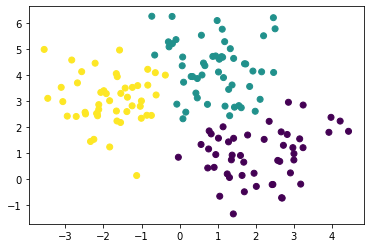

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# generate synthetic data
X, y = make_blobs(n_samples=150, n_features=2, centers=3, random_state=0)

# create an instance of AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)

# fit the model to the data
agg_clustering.fit(X)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_)
plt.show()


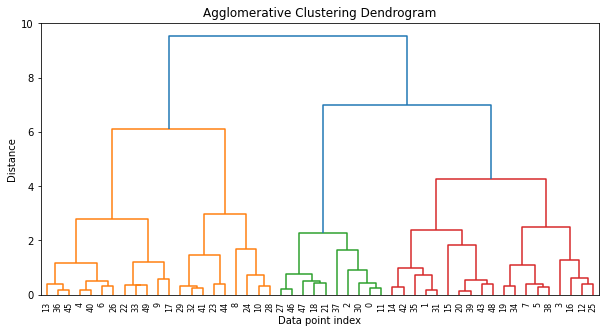

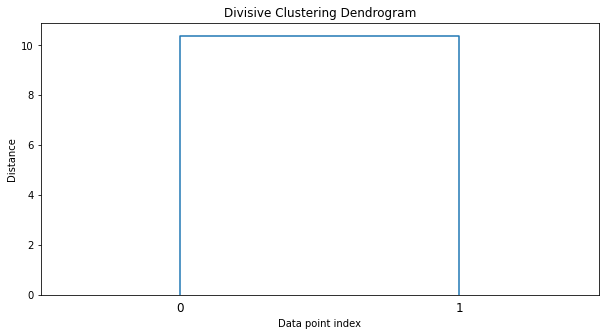

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random dataset with seed for reproducibility
np.random.seed(123)
X = np.random.randn(50, 2)

# Perform agglomerative clustering
Z_agg = linkage(X, method='ward')

# Plot dendrogram for agglomerative clustering
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data point index")
plt.ylabel("Distance")
dendrogram(Z_agg)
plt.show()

# Perform divisive clustering
Z_div = linkage(X.T, method='ward')

# Plot dendrogram for divisive clustering
plt.figure(figsize=(10, 5))
plt.title("Divisive Clustering Dendrogram")
plt.xlabel("Data point index")
plt.ylabel("Distance")
dendrogram(Z_div)
plt.show()


#### linkage method

The choice of linkage method can greatly affect the resulting clusters and dendrogram structures, and different linkage methods may be more appropriate for different datasets and clustering objectives.

Here is same code as above but with different linkage method:

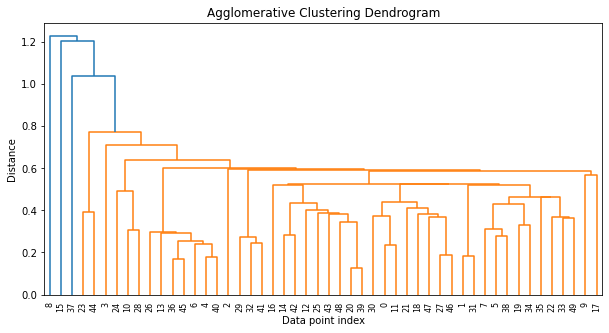

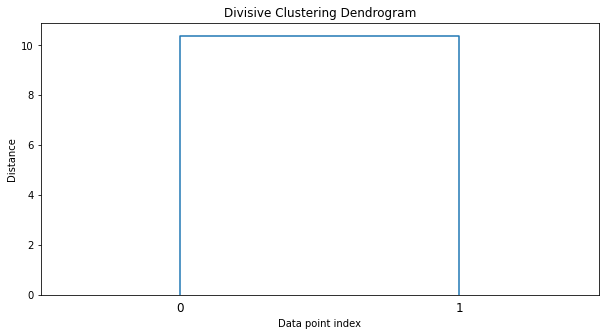

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random dataset with seed for reproducibility
np.random.seed(123)
X = np.random.randn(50, 2)

# Perform agglomerative clustering
Z_agg = linkage(X, method='single')

# Plot dendrogram for agglomerative clustering
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data point index")
plt.ylabel("Distance")
dendrogram(Z_agg)
plt.show()

# Perform divisive clustering
Z_div = linkage(X.T, method='single')

# Plot dendrogram for divisive clustering
plt.figure(figsize=(10, 5))
plt.title("Divisive Clustering Dendrogram")
plt.xlabel("Data point index")
plt.ylabel("Distance")
dendrogram(Z_div)
plt.show()


### 5.4 DBSCAN 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that is used to identify clusters of arbitrary shapes in large datasets. It is particularly useful when the data is not well-separated, and traditional clustering methods like K-means and hierarchical clustering may not work well.

The basic idea behind DBSCAN is to group together data points that are close to each other in the feature space, based on a distance metric and a density threshold. The algorithm starts by picking a random data point, and then looks for all the points within a certain distance (eps) of that point. If a minimum number (min_samples) of points are found within that distance, then a cluster is formed. The process is then repeated for all the points in the cluster, until no more points can be added. Points that are not part of any cluster are considered as noise.


In [14]:
from sklearn.cluster import DBSCAN
import numpy as np

# Create sample data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Define the DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=2)

# Fit the model to the data
dbscan.fit(X)

# View the cluster labels
print(dbscan.labels_)


[ 0  0  0  1  1 -1]


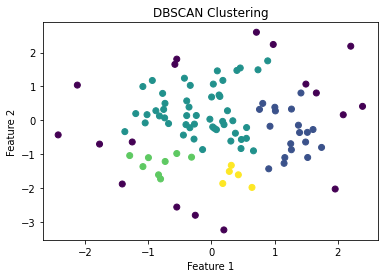

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate random dataset
np.random.seed(123)
X = np.random.randn(100, 2)

# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict with DBSCAN
y_pred = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Here's a real-life example of how DBSCAN can be used to cluster customer data based on their purchasing behavior in a retail store.

Suppose a retail store has collected data on customers' purchasing behavior, including the amount spent, the number of items purchased, and the time spent in the store. The store wants to use this data to segment customers into different groups based on their purchasing behavior. DBSCAN can be used to identify groups of customers that have similar purchasing behavior.


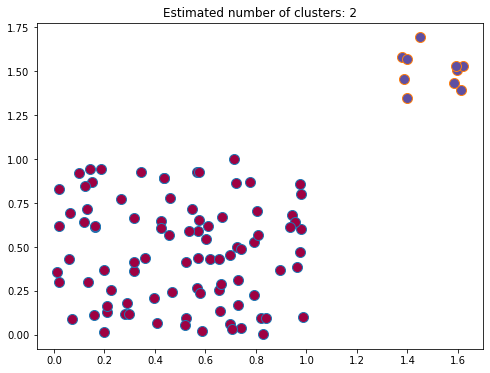

In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)

# Add noise to the data
X[50:60, :] = 1.5 + 0.1 * np.random.randn(10, 2)

# Cluster the data using DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

# Plot the results
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### 5.5 GMM (GAUSSIAN MIXTURE MODEL)

Gaussian Mixture Model (GMM) is a generative probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. It is a clustering algorithm that tries to find natural groupings in the data by assuming that the data points are generated from a mixture of Gaussian distributions with unknown parameters.

The GMM algorithm is a probabilistic model that assumes that the data points are generated from a mixture of Gaussian distributions. Each Gaussian distribution is represented by its mean, covariance, and weight. The weight represents the proportion of data points that belong to that Gaussian distribution. The GMM algorithm uses the Expectation-Maximization (EM) algorithm to estimate the parameters of the Gaussian distributions and the weights.

The GMM algorithm is a soft clustering algorithm, which means that it assigns each data point a probability of belonging to each cluster. This is useful when the data points do not clearly belong to a single cluster or when the clusters have overlapping regions.


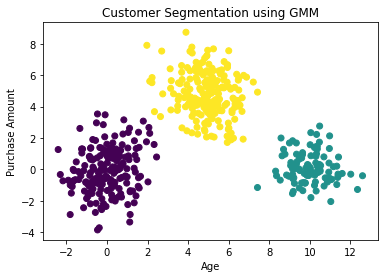

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate random dataset
np.random.seed(0)
n_samples = 500
X = np.zeros((n_samples, 2))
X[:200, :] = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.3], [0.3, 2]], size=200)
X[200:400, :] = np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.3], [-0.3, 2]], size=200)
X[400:, :] = np.random.multivariate_normal(mean=[10, 0], cov=[[1, 0], [0, 1]], size=100)

# Fit GMM model to data
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Predict clusters for each data point
labels = gmm.predict(X)

# Plot data points colored by their predicted cluster
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Customer Segmentation using GMM')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


### 5.7 PRINCIPAL COMPONENT ANALYSIS (PCA)

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original information as possible. The main idea behind PCA is to identify the directions of maximum variance in the data and project the data onto a new coordinate system defined by these directions.


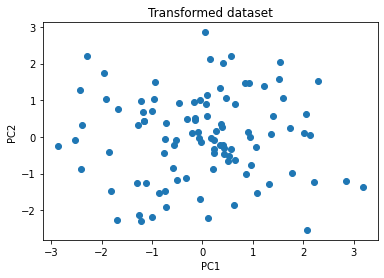

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a random dataset
np.random.seed(42)
X = np.random.rand(100, 10)

# Step 2: Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit the PCA model
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# Step 4: Transform the dataset
X_transformed = pca.transform(X_scaled)

# Step 5: Visualize the transformed dataset
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transformed dataset')
plt.show()


### 5.8 INDEPENDENT COMPONENT ANALYSIS (ICA) 

Independent Component Analysis (ICA) is a technique used for separating a multivariate signal into independent, non-Gaussian components. It is a popular technique in the field of signal processing and has been applied in various fields such as audio, image, and bio-medical signal processing.

The main idea behind ICA is to find a linear combination of the original variables such that the resulting components are statistically independent. In other words, the goal is to find a new set of variables that are as independent as possible from each other. This can be achieved by maximizing the non-Gaussianity of the resulting components.

The ICA algorithm is typically applied to data that has been preprocessed with some form of whitening or decorrelation technique. This is because ICA is sensitive to the correlation structure of the data, and decorrelating the data beforehand can help improve the performance of the algorithm.


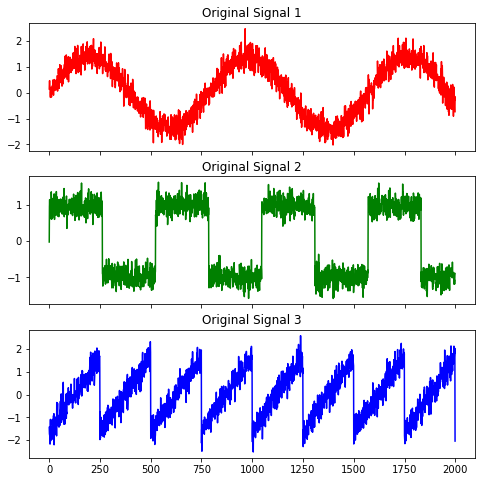

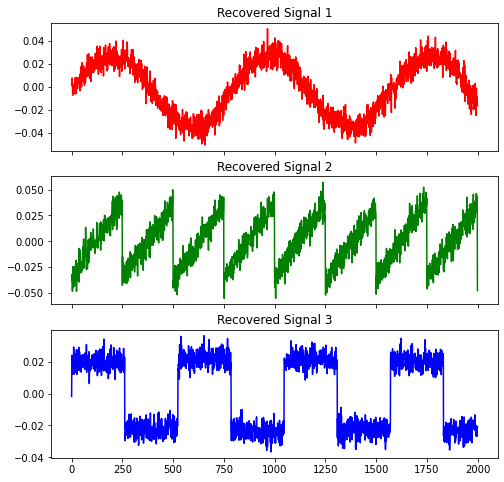

In [25]:
import numpy as np
from scipy import signal
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(42)

# generate random mixed signals
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # signal 1
s2 = np.sign(np.sin(3 * time))  # signal 2
s3 = signal.sawtooth(2 * np.pi * time)  # signal 3
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # add noise
S /= S.std(axis=0)  # standardize the data

# mix signals randomly
A = np.array([[0.5, 1, 1], [1, 0.5, 1], [1, 1, 0.5]])  # mixing matrix
X = np.dot(S, A.T)  # mixed signals

# apply Independent Component Analysis (ICA)
ica = FastICA(n_components=3)
S_hat = ica.fit_transform(X)

# plot the original and recovered signals
fig, axes = plt.subplots(3, sharex=True, figsize=(8, 8))
ax1, ax2, ax3 = axes

ax1.plot(S[:, 0], color='r')
ax1.set_title('Original Signal 1')

ax2.plot(S[:, 1], color='g')
ax2.set_title('Original Signal 2')

ax3.plot(S[:, 2], color='b')
ax3.set_title('Original Signal 3')

fig2, axes2 = plt.subplots(3, sharex=True, figsize=(8, 8))
ax4, ax5, ax6 = axes2

ax4.plot(S_hat[:, 0], color='r')
ax4.set_title('Recovered Signal 1')

ax5.plot(S_hat[:, 1], color='g')
ax5.set_title('Recovered Signal 2')

ax6.plot(S_hat[:, 2], color='b')
ax6.set_title('Recovered Signal 3')

plt.show()


### 5.9 T-SNE 

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data. It is a non-linear dimensionality reduction technique that is based on probability distributions with random walk on neighborhood graphs to find structure in the data.

t-SNE works by minimizing the divergence between two probability distributions: a distribution that measures pairwise similarities between the datapoints in the high-dimensional space, and a distribution that measures pairwise similarities between the datapoints in the low-dimensional space (i.e. the space where we want to represent the data). The t-SNE algorithm maps the high-dimensional data to a low-dimensional space while preserving the structure of the data, such as clusters or patterns.

The t-SNE algorithm has two main components: the similarity matrix and the low-dimensional embedding. The similarity matrix is computed using a similarity metric such as the Euclidean distance or the cosine similarity. The low-dimensional embedding is computed using gradient descent. The t-SNE algorithm iteratively updates the low-dimensional embedding to minimize the divergence between the two probability distributions.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


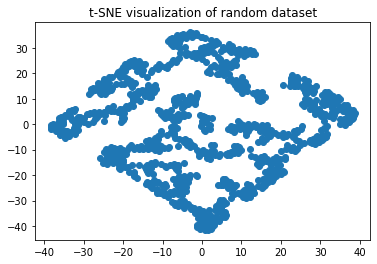

In [26]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate random dataset
np.random.seed(42)
X = np.random.rand(1000, 2)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30.0)
X_tsne = tsne.fit_transform(X)

# Visualize the dataset in 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE visualization of random dataset")
plt.show()


### 5.10 AUTOENCODERS 

Autoencoders are a type of neural network architecture that are designed to learn a compressed representation of input data. They consist of two main components: an encoder, which maps the input data to a lower-dimensional representation, and a decoder, which maps the lower-dimensional representation back to the original input data. The goal of the autoencoder is to learn a compressed representation of the input data that captures the most important features or patterns.

One common use case for autoencoders is dimensionality reduction. By training an autoencoder to learn a lower-dimensional representation of the input data, it can be used to reduce the number of features in a dataset while still preserving the most important information. Autoencoders can also be used for anomaly detection, by training the model on normal data and using it to identify data points that are significantly different from the training data.

Autoencoders can be implemented using various types of neural network architectures, such as feedforward neural networks, recurrent neural networks, and convolutional neural networks. The choice of architecture will depend on the specific problem and the type of input data.


In [29]:
!pip install tensorflow

^C


Epoch 1/50
32/32 [==============================] - 4s 2ms/step - loss: 0.7010
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6919
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6904
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6886
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6866
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6844
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6823
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6802
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6782
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6762
Epoch 13/50
32/32 [==============================

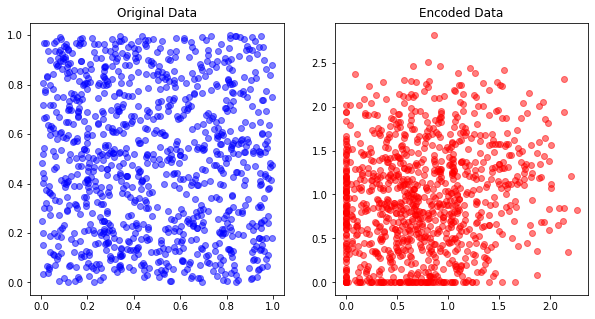

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Generate random dataset
np.random.seed(42)
n_samples = 1000
input_dim = 10
X = np.random.rand(n_samples, input_dim)

# Define autoencoder model
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(5, activation='relu')(input_layer)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = keras.models.Model(input_layer, decoded)

# Compile and train model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=50, batch_size=32)

# Use the encoder part of the autoencoder to get the encoded representation of the input data
encoder = keras.models.Model(input_layer, encoded)
encoded_X = encoder.predict(X)

# Plot the original and encoded data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(X[:, 0], X[:, 1], c='b', alpha=0.5)
axs[0].set_title('Original Data')
axs[1].scatter(encoded_X[:, 0], encoded_X[:, 1], c='r', alpha=0.5)
axs[1].set_title('Encoded Data')
plt.show()


### 5.11 ANOMALY DETECTION 

Anomaly detection, also known as outlier detection or novelty detection, is the process of identifying data points that do not conform to the expected pattern or normal behavior of a given dataset. These data points, also known as anomalies or outliers, can be caused by errors in data collection or measurement, or they can represent truly abnormal or rare events.

There are various techniques for anomaly detection, including statistical methods, machine learning algorithms, and domain-specific methods. Some common statistical methods include using the mean and standard deviation to identify data points that fall outside of a certain range, or using the Z-score to identify data points that are a certain number of standard deviations away from the mean.

Machine learning algorithms such as clustering and density-based methods can also be used for anomaly detection. Clustering algorithms group similar data points together and identify data points that do not belong to any cluster as anomalies. Density-based methods, on the other hand, identify data points that are in low-density regions of the dataset as anomalies.

There are also domain-specific methods for anomaly detection that are tailored to specific types of data and applications. For example, in the field of cyber security, intrusion detection systems use various techniques to identify abnormal behavior in network traffic. In the field of finance, fraud detection systems use various techniques to identify abnormal transactions.


#### Example (using the Isolation Forest algorithm)

here is an example of anomaly detection using the Isolation Forest algorithm on a randomly generated dataset:


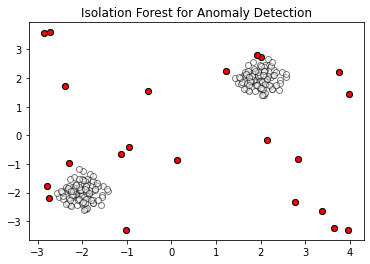

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate random dataset with anomalies
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2, np.random.uniform(low=-4, high=4, size=(20, 2))]

# Fit the isolation forest model
clf = IsolationForest(random_state=rng, contamination=0.1)
clf.fit(X_train)

# Predict anomalies
y_pred = clf.predict(X_train)
outliers = X_train[np.where(y_pred == -1)]

# Plot the dataset and anomalies
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolor='k', alpha=0.5)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k')
plt.title('Isolation Forest for Anomaly Detection')
plt.show()


#### Example (using the Gaussian Distribution)

One popular method of anomaly detection is using the Gaussian Distribution. Here's an example of how to implement anomaly detection using the Gaussian Distribution in Python:


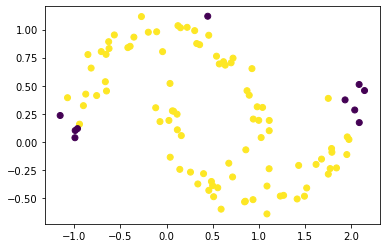

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.covariance import EllipticEnvelope

# Generate sample data
X, y = make_moons(n_samples=100, noise=0.1)

# Fit the model
clf = EllipticEnvelope(contamination=0.1) # Set contamination to 10% of the data
clf.fit(X)

# Predict if a data point is an outlier
pred = clf.predict(X)

# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=pred)
plt.show()
